## User Engagement

Data variables definition

    ● name: the user's name
    ● object_id: the user's id
    ● email: email address
    ● creation_source: how their account was created. This takes on one of 5 values:
        ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
        ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ○ ORG_INVITE: invited to an organization (as a full member)
        ○ SIGNUP: signed up via the website
        ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
    ● creation_time: when they created their account
    ● last_session_creation_time: unix timestamp of last login
    ● opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    ● enabled_for_marketing_drip: whether they are on the regular marketing email drip
    ● org_id: the organization (group of users) they belong to
    ● invited_by_user_id: which user invited them to join (if applicable).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import datetime
%matplotlib inline

os.getcwd()

'/Users/oluwafemibabatunde'

In [2]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/relax_challenge'
os.chdir(path)

In [3]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head(50)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [4]:
df1 = pd.read_csv('takehome_users.csv', engine='python')
df1.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [5]:
#df['Date'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S').dt.date
#df['time'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S').dt.time
#df = df.drop(['time_stamp'], axis=1)
df.head(60)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [6]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [7]:
df = df.set_index('time_stamp')

df = df.groupby(['user_id']).resample('7D', how='sum')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:1558: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


In [8]:
df.head()

user_id  visited
user_id time_stamp                  
1       2014-04-22        1        1
2       2013-11-15        2        1
        2013-11-22        0        0
        2013-11-29        2        1
        2013-12-06        2        1

In [9]:
df = df.drop('user_id', axis=1)

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption .

In [10]:
df = df[df['visited']>=3]
df.head()

visited
user_id time_stamp         
2       2014-02-07        3
10      2013-02-13        3
        2013-02-27        3
        2013-03-20        3
        2013-04-10        3

In [11]:
df = df.reset_index()
first = df.user_id.unique()

In [12]:
df1['7Days'] = df1['object_id'].isin(first).astype(int)

In [13]:
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [14]:
df1.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
7Days                           int64
dtype: object

In [15]:
df1.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
7Days                            0
dtype: int64

In [16]:
df1 = df1.fillna(value = {'last_session_creation_time':0})
df1['invited_by_user_id'] = df1['invited_by_user_id'].ffill()
#df1['last_session_creation_time'] = df1['last_session_creation_time'].astype(int)


In [17]:
def f(row):
    row = datetime.datetime.utcfromtimestamp(row).strftime('%Y-%m-%d %H:%M:%S')
    return row

df1['last_session_creation_time'] = df1['last_session_creation_time'].apply(f)


In [18]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [19]:
df1['creation_time'] = pd.to_datetime(df1['creation_time'])
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])
df1['Retention'] = df1['last_session_creation_time'] - df1['creation_time']
df1['Retention'] = df1['Retention'].astype('timedelta64[D]').astype(int)

In [20]:
def f(row):
    if row < 0:
        row = 0
    return row

df1['Retention'] = df1['Retention'].apply(f)

In [21]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days,Retention
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5


In [22]:
df1['creation_time'] = df1['creation_time'].dt.weekday_name.head()
df1['last_session_creation_time'] = df1['last_session_creation_time'].dt.weekday_name.head()

In [23]:
df1.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days,Retention
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,5928.445167,0.122667,43.543083
std,3464.24595,0.432742,0.356432,124.056723,3396.672604,0.328068,126.352426
min,1.00000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,2994.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,5909.500000,0.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,8841.000000,0.000000,3.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,1.000000,729.000000


In [24]:
df1.corr()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days,Retention
object_id,1.000000,-0.032370,-0.022040,0.004110,0.032938,0.001665,-0.005231
opted_in_to_mailing_list,-0.032370,1.000000,0.483529,0.003432,-0.000731,0.010412,0.006949
enabled_for_marketing_drip,-0.022040,0.483529,1.000000,0.009275,-0.001754,0.005118,0.008836
org_id,0.004110,0.003432,0.009275,1.000000,-0.034509,0.063510,0.056134
invited_by_user_id,0.032938,-0.000731,-0.001754,-0.034509,1.000000,0.007415,0.006451
7Days,0.001665,0.010412,0.005118,0.063510,0.007415,1.000000,0.816581
Retention,-0.005231,0.006949,0.008836,0.056134,0.006451,0.816581,1.000000


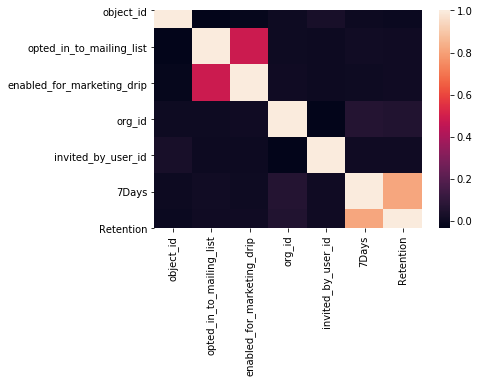

In [25]:
sns.heatmap(df1.corr())

In [26]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days,Retention
0,1,Tuesday,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,Tuesday,1,0,11,10803.0,0,0
1,2,Friday,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,Monday,0,0,1,316.0,1,136
2,3,Tuesday,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,Tuesday,0,0,94,1525.0,0,0
3,4,Tuesday,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,Wednesday,0,0,1,5151.0,0,1
4,5,Thursday,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,Tuesday,0,0,193,5240.0,0,5


In [27]:
df1 = pd.concat([df1,pd.get_dummies(df1['creation_time'], prefix='cr8Day')],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['name'], prefix='name')],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['creation_source'], prefix='cr8Source')],axis=1)
df1 = pd.concat([df1,pd.get_dummies(df1['last_session_creation_time'], prefix='LastDay')],axis=1)
df1 = df1.drop(['creation_time', 'name', 'creation_source', 'last_session_creation_time', 'email'], axis = 1)

In [28]:
df1.shape

(12000, 11367)

In [29]:
col_names = ['org_id','invited_by_user_id','Retention']
dflog = np.log(df1[col_names]+1)
dflog.describe()

,org_id,invited_by_user_id,Retention
count,12000.000000,12000.000000,12000.000000
mean,4.247192,8.394999,1.260681
std,1.538961,0.968442,1.912102
min,0.000000,1.386294,0.000000
25%,3.401197,8.004700,0.000000
50%,4.691348,8.684486,0.000000
75%,5.477507,9.087268,1.386294
max,6.033086,9.392662,6.593045


In [30]:
from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

col_names = ['org_id','invited_by_user_id','Retention']

scaledCols = ['org_id','invited_by_user_id','Retention'] 

dfScale = SS_scaler.fit_transform(dflog[col_names])

dfScale = pd.DataFrame(dfScale , columns=scaledCols)



dfScale.head()

,org_id,invited_by_user_id,Retention
0,-1.145161,0.921800,-0.659344
1,-2.309476,-2.722112,1.913837
2,0.199289,-1.099331,-0.659344
3,-2.309476,0.157106,-0.296824
4,0.663245,0.174792,0.277757


In [31]:
dfScale.reset_index(drop = True, inplace =True)

In [32]:
dfScaled = pd.concat([df1,pd.DataFrame(dfScale , columns=scaledCols)],axis=1)
dfScaled.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,7Days,Retention,cr8Day_Friday,cr8Day_Thursday,cr8Day_Tuesday,...,cr8Source_ORG_INVITE,cr8Source_PERSONAL_PROJECTS,cr8Source_SIGNUP,cr8Source_SIGNUP_GOOGLE_AUTH,LastDay_Monday,LastDay_Tuesday,LastDay_Wednesday,org_id,invited_by_user_id,Retention
0,1,1,0,11,10803.0,0,0,0,0,1,...,0,0,0,0,0,1,0,-1.145161,0.921800,-0.659344
1,2,0,0,1,316.0,1,136,1,0,0,...,1,0,0,0,1,0,0,-2.309476,-2.722112,1.913837
2,3,0,0,94,1525.0,0,0,0,0,1,...,1,0,0,0,0,1,0,0.199289,-1.099331,-0.659344
3,4,0,0,1,5151.0,0,1,0,0,1,...,0,0,0,0,0,0,1,-2.309476,0.157106,-0.296824
4,5,0,0,193,5240.0,0,5,0,1,0,...,0,0,0,0,0,1,0,0.663245,0.174792,0.277757


In [33]:
dfScaled = dfScaled.drop(['org_id','invited_by_user_id','Retention'], axis=1)


In [34]:
X = dfScaled.drop(['7Days'], axis =1)

y = dfScaled['7Days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=30)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train = fs.transform(X_train)
	# transform test input data
	X_test = fs.transform(X_test)
	return X_train, X_test, fs

# feature selection
X_train, X_test, fs = select_features(X_train, y_train, X_test)

## Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=100),
 {'C': 100},
 0.8795555555555555,
 {'mean_fit_time': array([0.01262002, 0.00721631, 0.01238451, 0.02270999, 0.02877102,
         0.03974824]),
  'std_fit_time': array([0.00528254, 0.0001822 , 0.0005499 , 0.00102978, 0.00472155,
         0.00252145]),
  'mean_score_time': array([0.00104623, 0.00065961, 0.00071931, 0.00068789, 0.00068841,
         0.00067005]),
  'std_score_time': array([4.67059657e-04, 9.10072168e-06, 8.63166140e-05, 3.39832713e-05,
         4.06125878e-05, 1.18909459e-05]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.0001},
   {'C': 0.001},
   {'C': 0.1},
   {'C': 1},
   {'C': 10},
   {'C': 100}],
  'split0_test_score': array([0.87833333, 0.87833333, 0.87833333, 0.87833333, 0.87944444,
         0.87944444]),
  'split1_test_score': array([0.87833333, 0.87833333, 0.87833333, 0.87833333,

In [38]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(X_train, y_train)
ypred=clfl2.predict(X_test)
accuracy_score(ypred, y_test)

0.874

In [39]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,ypred)
print(cnf_matrix)
Accuracy_lr=clfl2.score(X_test,y_test)

print(Accuracy_lr)

[[2622    1]
 [ 377    0]]
0.874


In [40]:
from sklearn.model_selection import cross_val_score

clfl = LogisticRegression()

cv_scores_test= cross_val_score(clfl,X_test,y_test,cv=10,scoring='roc_auc')
cv_scores_train= cross_val_score(clfl,X_train,y_train,cv=10,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.58529442 0.59207687 0.61905251 0.59798112 0.55423865 0.51320812
 0.54811169 0.55745279 0.620681   0.54580153]
Mean cross validation test score: 0.5733898689739944
Mean cross validation train score: 0.5691160685748582
Standard deviation in cv test scores: 0.033256405995712245


## K Nearest Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier


# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)

[[2623    0]
 [ 377    0]]
0.8743333333333333


In [42]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.51906032 0.58165079 0.53954286 0.55264413 0.54940488]
Mean cross validation test score: 0.5484605967845823
Mean cross validation train score: 0.5455416634174661
Standard deviation in cv scores: 0.020316915767358123


## Support Vector Machine

In [43]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[2622    1]
 [ 377    0]]
0.874


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.5 0.5 0.5 0.5 0.5]
Mean cross validation test score: 0.5
Mean cross validation train score: 0.5355635846914992
Standard deviation in cv scores: 0.0


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[2623    0]
 [ 377    0]]
0.8743333333333333


In [46]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.59210159 0.6072381  0.52928254 0.55264413 0.58275161]
Mean cross validation test score: 0.5728035926967546
Mean cross validation train score: 0.5690228426029419
Standard deviation in cv scores: 0.028133952348591885


## Naive Baise

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[2622    1]
 [ 377    0]]
0.874


In [48]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.59210159 0.6072381  0.52928254 0.55264413 0.58266372]
Mean cross validation test score: 0.5727860153564573
Mean cross validation train score: 0.5765673422115937
Standard deviation in cv scores: 0.02812775837738452


## Gradient Boosting

In [49]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[2623    0]
 [ 377    0]]
0.8743333333333333


In [50]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.59210159 0.6072381  0.52928254 0.55264413 0.58275161]
Mean cross validation test score: 0.5728035926967546
Mean cross validation train score: 0.5690234202386213
Standard deviation in cv scores: 0.028133952348591885


## Model Comparison

In [51]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.874000
1                  KNN              0.874333
2                  SVM              0.874000
3        Random Forest              0.874333
4       Gradient Boost              0.874333
5          Naive Bayes              0.874000


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.569116,0.573390
1,KNN,0.545542,0.548461
2,SVM,0.535564,0.500000
3,Random Forest,0.569023,0.572804
4,Gradient Boost,0.569023,0.572804
5,Naive Bayes,0.576567,0.572786


The best performing model is the Logistic Regression based on accuracy score. This model came out as best performing model as there was hyperparameter tuning of the model.

In [52]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [53]:
gs_NB.best_params_

{'var_smoothing': 0.0533669923120631}

In [54]:
gs_NB.best_score_

0.8799999999999999

The model accuracy of the naive bayes model did not improve despite the tuning done

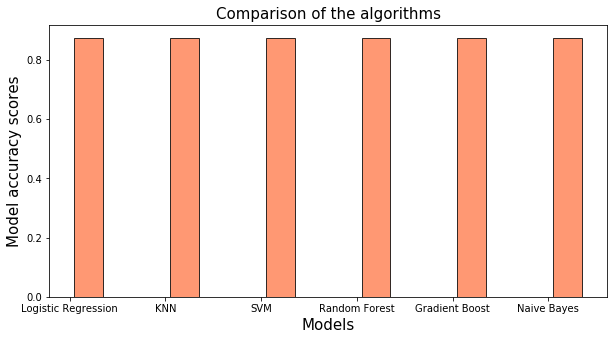

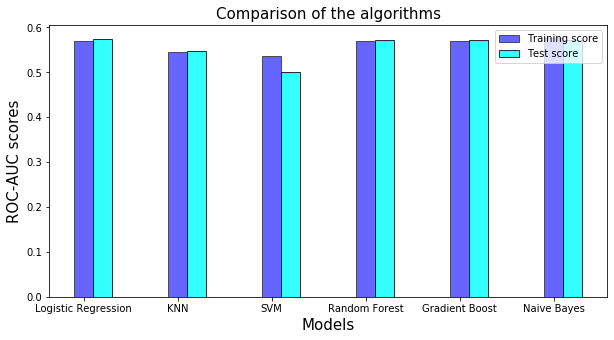

In [55]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()

plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()

plt.show()

## ROC-AUC Score and the ROC curve:

In [56]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(X_train, y_train)
y_scores = clfl2.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.5720412470382892


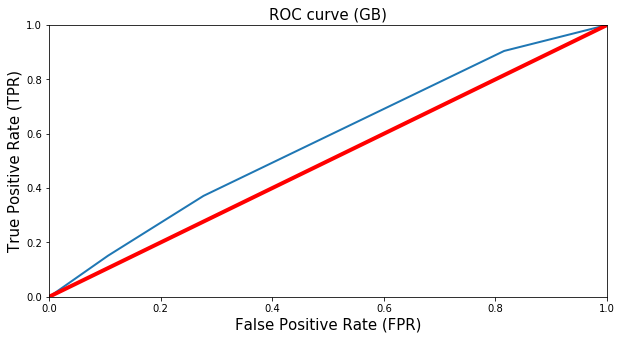

In [57]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()

In [58]:
clfl2.coef_

array([[ 5.37507203,  5.36789213,  2.66161774,  5.74772556,  5.47923739,
         2.66161774,  5.47923739,  2.58162898,  5.82567721,  5.5762482 ,
         4.96080275,  4.96080275,  4.96080275,  5.52240249,  4.96080275,
         4.96080275,  4.96080275,  4.96080275,  4.74503043,  4.96080275,
         4.74503043,  4.74503043,  4.96080275,  4.96080275,  4.96080275,
         4.74503043,  0.25225376, -0.63756923,  0.28374391,  4.96080275]])

In [59]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1)
0.8786666666666667


In [60]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
y_predictions_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.8743333333333333
0.5728035926967546


In [61]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.5720412470382892


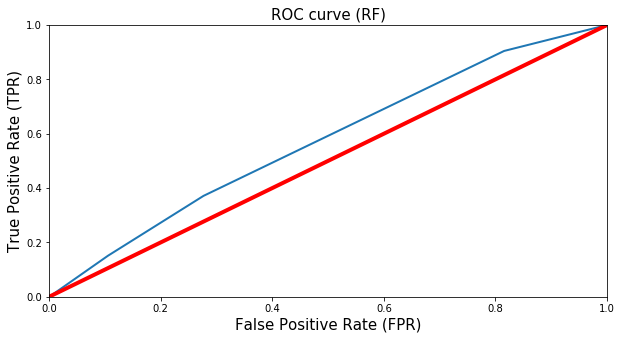

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)

plt.show()

In [63]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
tab

,Features,Importance scores
0,object_id,0.020350
1,opted_in_to_mailing_list,0.020410
2,enabled_for_marketing_drip,0.020911
3,cr8Day_Friday,0.021679
4,cr8Day_Thursday,0.021712
5,cr8Day_Tuesday,0.021874
6,name_Aachen David,0.021988
7,name_Aachen Diana,0.022195
8,name_Aachen Frank,0.022198
9,name_Aachen Klaus,0.022283


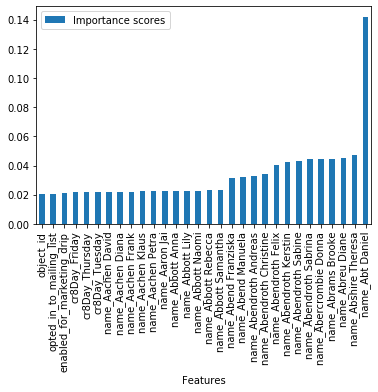

In [64]:
tab.plot(kind='bar', x = 'Features', y ='Importance scores')

In [65]:
features = X
importances = list(gbc.feature_importances_)
imp=np.sort(importances)
tab1=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
tab1

,Features,Importance scores
0,object_id,0.019866
1,opted_in_to_mailing_list,0.019887
2,enabled_for_marketing_drip,0.019919
3,cr8Day_Friday,0.019927
4,cr8Day_Thursday,0.021360
5,cr8Day_Tuesday,0.021365
6,name_Aachen David,0.021380
7,name_Aachen Diana,0.021381
8,name_Aachen Frank,0.021390
9,name_Aachen Klaus,0.021392


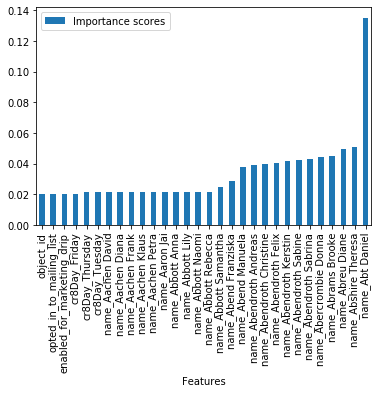

In [66]:
tab1.plot(kind='bar', x = 'Features', y ='Importance scores')